In [19]:
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError

In [20]:
# Path configurations for Jupyter
import os

project_root = os.path.dirname(os.getcwd())   # current working directory (where notebook is running)
data_path = os.path.join(project_root, 'data', 'raw')

classes = ['Parasitized', 'Uninfected']
print("Project root:", project_root)
print('')
print("Data path:", data_path)


Project root: c:\Users\USER\LLMOPs_Projects\smart_malaria_detection_system

Data path: c:\Users\USER\LLMOPs_Projects\smart_malaria_detection_system\data\raw


Count Images per Class

In [21]:
counts = {}

for cls in classes:
    # Path to class directory (Parasitized and Uninfected folders)
    class_dir = os.path.join(data_path, cls) 
    counts[cls] = len(os.listdir(class_dir)) # Count number of files in each class directory
print(class_dir)
print("Image counts per class:", counts)

c:\Users\USER\LLMOPs_Projects\smart_malaria_detection_system\data\raw\Uninfected
Image counts per class: {'Parasitized': 13779, 'Uninfected': 13779}


Plot Class Distribution

C:\Users\USER\AppData\Local\Temp\ipykernel_12752\3143176239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


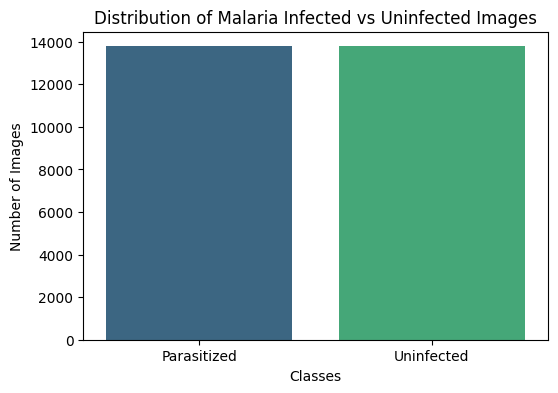

In [22]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x=list(counts.keys()),
    y=list(counts.values()),
    palette='viridis',
)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Malaria Infected vs Uninfected Images')
plt.show()

Show Random Sample Images

In [23]:
def show_random_images(class_name, image_num=5):
    '''
    Display random images from a specified class.
    '''
    class_dir = os.path.join(data_path, class_name)
    images = random.sample(os.listdir(class_dir), image_num)
    
    # Set up the plot
    plt.figure(figsize=(15, 3)) # Width, Height i.e. 15 inches wide, 3 inches tall means 
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = Image.open(img_path)
            plt.subplot(1, image_num, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{class_name} Image')
    
        except UnidentifiedImageError:
            print(f"Could not open image: {img_path}")
            
        except Exception as e:
            print(f"An error occurred loading the image {img_path}: {e}")
    plt.show()
            

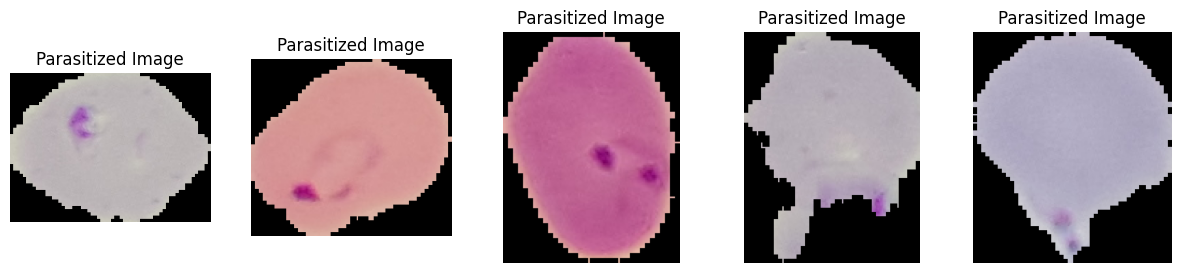

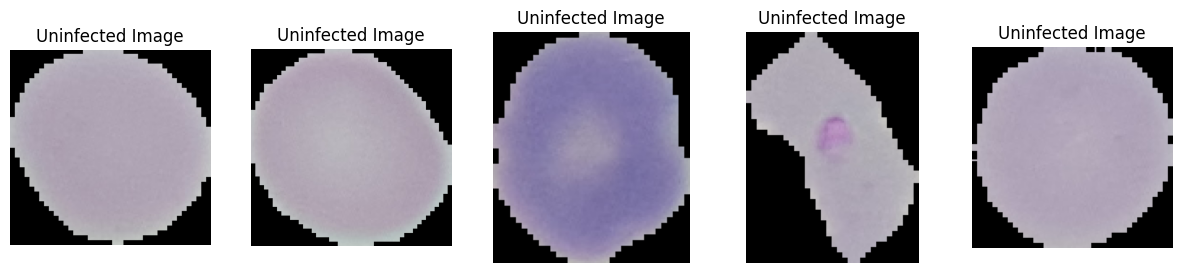

In [24]:
show_random_images('Parasitized', image_num=5)
show_random_images('Uninfected', image_num=5)   

Inspect Image Dimensions

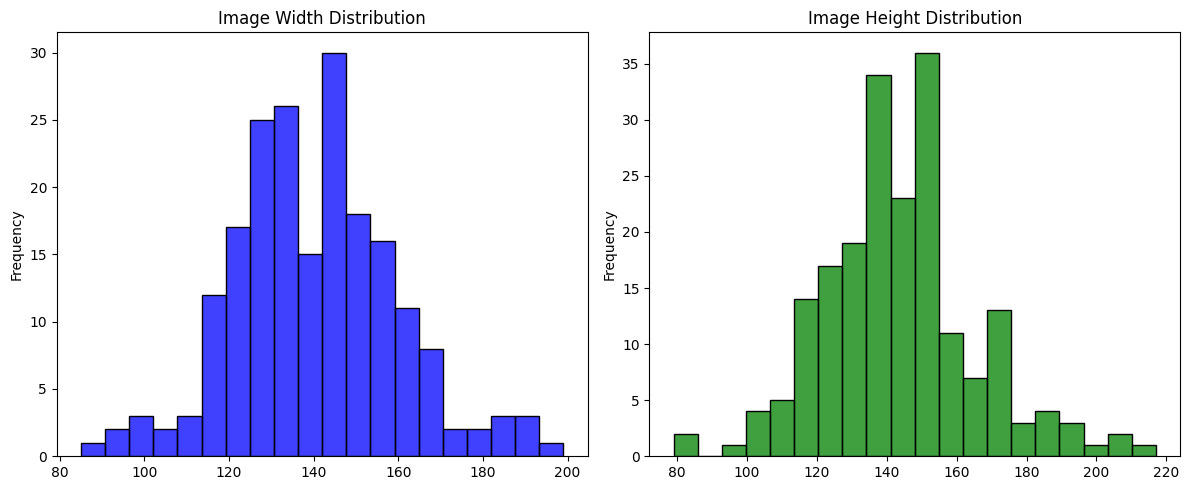

In [ ]:
# --- Inspect image dimensions ---
dims = []
for cls in classes:
    folder = os.path.join(data_path, cls)
    for file in os.listdir(folder)[:100]:  # sample 100 images
        img_path = os.path.join(folder, file)
        try:
            img = Image.open(img_path)
            dims.append(img.size)
        
        except UnidentifiedImageError:
            print(f"Could not open image: {img_path}")
        except Exception as e:
            print(f"An error occurred loading the image {img_path}: {e}")


# Plot histogram of image widths and heights
widths = [w for w,h in dims] 
heights = [h for w,h in dims]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(widths, bins=20, kde=False, color="blue")
plt.ylabel('Frequency')
plt.tight_layout()
plt.title("Image Width Distribution")

plt.subplot(1,2,2)
sns.histplot(heights, bins=20, kde=False, color="green")
plt.title("Image Height Distribution")
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()
